<a href="https://colab.research.google.com/github/011010110100/estatistica-aplicada-4T/blob/main/Fase2_Estat%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fase 2 - Estatística Aplicada
Marcos de Brito Paceka


### 1.1 Bibliotecas
Para ampliar o uso do R utilizaremos as seguintes bibliotecas adicionais.

In [2]:
ini <- Sys.time()
install.packages(c('skimr','tidyverse'), dep = TRUE)
Sys.time()-ini
library(skimr)
library(tidyverse)
library(MASS)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘lazyeval’, ‘rex’, ‘extrafontdb’, ‘Rttf2pt1’, ‘covr’, ‘extrafont’, ‘feather’, ‘mockr’




Time difference of 1.091654 mins

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




In [3]:
# Carregando os dados e armazenando dentro da variável "fifa"
url0 <- 'https://raw.githubusercontent.com/filipezabala/pucrs-tecnologo-bd/main/dados/Anexo_Projeto_fifa_world_national_teams_versa%CC%83o_oficial%2020241.csv'
fifa <- read.csv(url0, sep = ';')
head(str(fifa))

'data.frame':	718 obs. of  30 variables:
 $ id                           : int  158023 153079 211110 201399 226226 199667 212616 216816 183892 231478 ...
 $ name                         : chr  "Messi" "Aguero" "Dybala" "Icardi" ...
 $ full_name                    : chr  "Lionel Andr\xe9s Messi Cuccittini" "Sergio Leonel Ag\xfcero del Castillo" "Paulo Bruno Exequiel Dybala" "Mauro Emanuel Icardi Rivero" ...
 $ overall_rating               : int  94 89 89 87 82 77 77 78 79 79 ...
 $ value_euro                   : int  110500000 64500000 89000000 64500000 30000000 8500000 12000000 15000000 8500000 18000000 ...
 $ wage_euro                    : int  565000 300000 205000 130000 83000 28000 27000 53000 19000 54000 ...
 $ nationality                  : chr  "Argentina" "Argentina" "Argentina" "Argentina" ...
 $ national_team                : chr  "Argentina" "Argentina" "Argentina" "Argentina" ...
 $ club_team                    : chr  "FC Barcelona" "Manchester City" "Juventus" "Inter" ...
 

NULL

# Calculando uma probabilidade Incondicional

É uma probabilidade de um evento ocorrer sem levar em conta a ocorrência de outros eventos.

In [4]:
# Qual a probabilidade de um jogador escolhido aleatoriamente ter um "finishing" maior que 73?

# Criando um subconjunto de dados com a nossa "regra" de finishing > 73
jogadores_finishing_maior_73 <- sum(fifa$finishing > 73, na.rm = TRUE)
cat("Jogadores com 'finishing' > 73:", jogadores_finishing_maior_73, "\n")

# Calculando o Total de Jogadores do nosso csv ""fifa"
total_jogadores <- nrow(fifa)
cat("Total de Jogadores:", total_jogadores, "\n")

# Calculando a probabilidade dada no enunciado.
prob_finishing_maior_73 <- (jogadores_finishing_maior_73 / total_jogadores)*100

# Retornando a proporção
cat("A probabilidade de um jogador aleatório ter um finishing maior que 73 é de:", prob_finishing_maior_73, TRUE)

Jogadores com 'finishing' > 73: 132 
Total de Jogadores: 718 
A probabilidade de um jogador aleatório ter um finishing maior que 73 é de: 18.3844 TRUE

# Calculando uma probabilidade Condicional

É a probabilidade de um evento ocorrer dado que outro evento já ocorreu, ou seja, existe uma condição.

In [5]:
# 1º Qual a probabilidade de um jogador escolhido aleatoriamente ter um "finishing" maior que 73
# visto que o jogador escolhido foi um ATACANTE?

# Criar uma tabela de contingência para Finishing > 73 e Atacante
# fifa$finishing > 73 === retorna uma lisde de booleano (TRUE, FALSE).
# fifa$Atacante       === retorna uma lista de binários, indicando se é ou não atacante.
atacantes <- fifa$Atacante
tabela <- table(fifa$finishing > 73, atacantes)
#print_formatado("Atacantes:", sum(atacantes))
print(tabela)
# Com essa tabela, podemos observar que:
# temos 22 atacantes que não possuem o "finishing" maior que 73.
# temos 50 atacantes com o "finishing" maior que 73.
# Total de atacantes => 50 + 22 = 72 atacantes.
# Outro detalhe curioso é que, apenas 82 jogadores que não são atacantes possuem o chute maior que 73.
# O que condiz com os resultados da célula anterior, que nos diz que 132 jogadores posuem chute > 73
# 132 = 82 (não atacantes) + 50 (atacantes)   , onde: não atacantes = goleiro, zagueiro, meio-campo...


# P(Finishing > 73 | Atacante = 1)
# A posição [2, 2] indica o que estamos interessados, ou seja, nos atacantes com finishing > 73
prob_condicional <- (prop.table(tabela, margin = 2)[2, 2])*100

# Exibir o resultado
cat("A probabilidade de um jogador ter 'finishing' > 73, sabendo que ele é ATACANTE é de :", prob_condicional, TRUE)

       atacantes
          0   1
  FALSE 564  22
  TRUE   82  50
A probabilidade de um jogador ter 'finishing' > 73, sabendo que ele é ATACANTE é de : 69.44444 TRUE

# Intervalos de Confiança

São faixas de valores que indicam onde possivelmente está o verdadeido valor.

In [6]:
# Calculando o Intervalo de Confiança (IC) do overall_rating        [1ª Variável]
ic_overall_rating <- t.test(fifa$overall_rating)$conf.int
# t.test() -> teste t de Student (teste estatístico que compara médias)


cat("Intervalo de confiança para o 'overall rating' (com 95%): [" , round(ic_overall_rating, 2), "]")

# Logo, podemos concluir que a média real do overall_rating dos jogadores está entre [76.02 e 76.9] com 95% de confiança
# O IC fornece uma estimativa de onde podemos esperar que a média real está, com base na nossa amostra.

Intervalo de confiança para o 'overall rating' (com 95%): [ 76.02 76.9 ]

In [7]:
# Calculando o Intervalo de Confiança (IC) para a idade
ic_age <- t.test(fifa$age)$conf.int

# Exibindo o resultado
cat("Intervalo de confiança para 'age' (com 95%): [" , round(ic_age, 2), "]")

# Logo, podemos concluir que a média real da idade dos jogadores está entre [26.3 e 26.83] com 95% de confiança

Intervalo de confiança para 'age' (com 95%): [ 26.3 26.83 ]

# Teste de Hipótese

Precisamos definir a Hipótese Nula (H0) e a Hipótese Alternativa (H1).

In [8]:
# um resumo sobre a variável height_cm
summary(fifa$height_cm)

# Calculando a média amostral arredondada para o número inteiro mais próximo
media <- mean(fifa$height_cm)
ma <- round(media, 0)

# Definindo as hipóteses:
# H0: A média populacional da altura é igual à média amostral arredondada      (μ = 177)
# H1: A média populacional da altura é diferente da média amostral arredondada (μ ≠ 177)
teste_height <- t.test(fifa$height_cm, mu = ma)

cat("------------------------------------------------\n")
cat("Teste de Hipótese para Height (Altura)\n")
cat("Média amostral:", media, "\n")
cat("Média arredondada:", ma, "\n")
cat("Valor-p:", teste_height$p.value, "\n")


# Logo, como nosso 'p-value' nos retornou 0.96, não há evidências estatísticas para rejeitar a hipótese nula (H0)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    152     170     183     177     188     203 

------------------------------------------------
Teste de Hipótese para Height (Altura)
Média amostral: 177.0237 
Média arredondada: 177 
Valor-p: 0.9646653 


In [9]:
summary(fifa$wage_euro)


# Definindo nossas hipóteses para média dos salários.
# H0 => (μ = 10.000)
# H1 => (μ ≠ 10.000)

media_salario <- mean(fifa$wage_euro, na.rm = TRUE)

# Média hipotética
media_h <- 10000

# Teste t para verificar se a média é estatisticamente diferente de media_h
teste_salario <- t.test(fifa$wage_euro, mu = media_h, na.rm = TRUE)

# Resultados
cat("------------------------------------------------\n")
cat("Teste de Hipótese para 'wage euro'\n")
cat("Média amostral do salário:", round(media_salario, 2), "euros\n")
cat("Valor-p:", round(teste_salario$p.value, 4), "\n")


if (teste_salario$p.value < 0.05) {
  cat("Rejeitamos H0: O salário médio é estatisticamente diferente de", media_h, "euros.\n")
} else {
  cat("Não há evidências para rejeitar H0: O salário médio pode ser considerado", media_h, "euros.\n")
}

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1000   10000   27000   49560   59000  565000 

------------------------------------------------
Teste de Hipótese para 'wage euro'
Média amostral do salário: 49559.89 euros
Valor-p: 0 
Rejeitamos H0: O salário médio é estatisticamente diferente de 10000 euros.


# Regressão Linear


Call:
lm(formula = heading_accuracy ~ jumping, data = fifa)

Residuals:
    Min      1Q  Median      3Q     Max 
-56.219  -4.789   3.788  11.762  48.185 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 16.49432    4.15430    3.97  7.9e-05 ***
jumping      0.61577    0.05918   10.41  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 18.64 on 716 degrees of freedom
Multiple R-squared:  0.1314,	Adjusted R-squared:  0.1301 
F-statistic: 108.3 on 1 and 716 DF,  p-value: < 2.2e-16



	Shapiro-Wilk normality test

data:  fit_jumping_heading$residuals
W = 0.88677, p-value < 2.2e-16


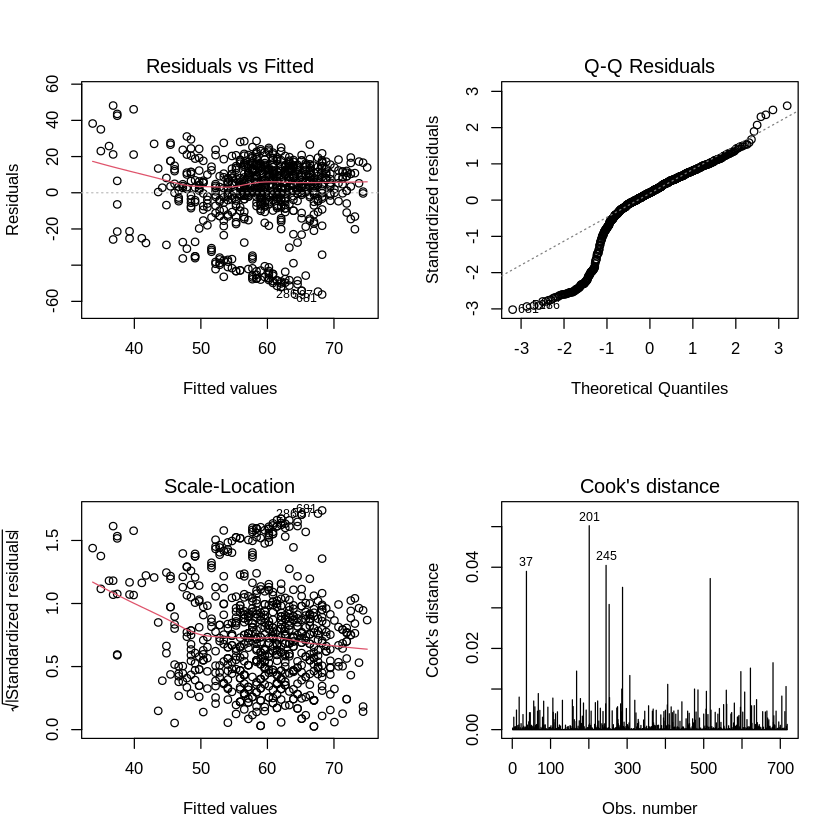

In [14]:
# Criando um modelo de regressão linear (linear model)
# tentando pegar alguma relação do pulo do jogador com a precisão do cabeceio
fit_jumping_heading <- lm(heading_accuracy ~ jumping, data = fifa)

# cria nosso resumo estatístico
summary(fit_jumping_heading)

# verificando se o modelo segue uma distribuição normal -> maior que 0.05 são aproximadamente normais
shapiro.test(fit_jumping_heading$residuals)

# Geração dos gráficos para diagnósticos
par(mfrow = c(2,2))
plot(fit_jumping_heading, which = 1:4)


# ANALISE FINAL
# O modelo de regressão linear simples foi ajustado para prever a precisão do cabeceio com base na capacidade de salto (jumping), revelando
# relaçõs estatisticamente significativas entre as variáveis escolhidas.
# O coeficiente estimado para o jumping foi de 0.61577, mostrando que para cada aumento de unidade, espera-se um aumento médio na precisão do cabeceio.
# O coeficiente ajustado indica que apenas 13% da variação na precisão do cabeceio.

# Resíduos
# O teste shapiro-wilk resultou em W = 0.88, indicando que os resíduos não seguem uma distriuição normal
# Os gráficos mostra dipersões irregulares, sugerindo que a relação entre jumping e heading_accuracy não é completamente linear, mas existe um padrão não aleatório.
# Q-Q Plot mostra as curvas que desviam da linha de normalidade nos extremos, reforçando a arugmentação de que não segue uma Normal.

#Manchete

##1. "Com grandes saltos, temos grandes cabeceios?"

##2. "Modelo revela: há mais do que impulsão por trás de um bom cabeceio no futebol!"

##3. "Jogadores com maior impulsão tendem a cabecear melhor, mas a relação não é tão forte quanto parece!"